In [1]:
%matplotlib inline

from collections import Counter
import glob

import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


In [3]:
DATA_FOLDER = '../data/parsed_new/'
DATA_FILES = glob.glob(DATA_FOLDER + '*.csv')

TEST_DATA_FILES = DATA_FILES[:5]

### Document Length

In [3]:
# Get raw number of words per document
get_raw_numwords = lambda x: len(x.replace('TEXT:', '').replace('Table of Contents', '').lower().split())

# Get number of tokens-terms per document
def get_tokens_terms(x):
    _counter = eval(x)
    return ( len(_counter.keys()), sum(_counter.values()) )

# Update counter with next
update_counter = lambda x, y: x + eval(y)

In [26]:
# Get total number of tokens-terms + frequencies
global_counter = Counter()

EDA_info = pd.DataFrame()

for i, filepath in enumerate(DATA_FILES):
    
    _data = pd.read_csv(filepath)
    ticker = filepath.split('/')[-1].replace('.csv', '')

    raw_numw =  _data.text.apply( get_raw_numwords )
    doc_tokens, doc_terms = zip(*_data.bow.apply( get_tokens_terms ).values)

    EDA_info = pd.concat([ EDA_info, pd.DataFrame({ 'ticker': ticker,
                                                    'raw_num': raw_numw,
                                                    'doc_tokens': doc_tokens,
                                                    'doc_terms': doc_terms }) ])
    
    global_counter = reduce( update_counter, [global_counter, ] + list(_data.bow.values) )

print 'Done!'

Done!


Let's save the results for later exploration as well

In [6]:
import cPickle as pk

In [7]:
# Save global_counter
with open('data/glob_counter.pk', 'wb') as f:
    pk.dump(global_counter, f)

# Save the EDA_info dataframe
EDA_info.to_csv('data/EDA_info.csv')

print '... Saved!'

... Saved!


In [13]:
EDA_info.head(2)

,doc_terms,doc_tokens,raw_num,ticker
0,224,101,294,A
1,225,159,304,A


### Descriptive Graphs

In [2]:
import seaborn as sns
import numpy as np

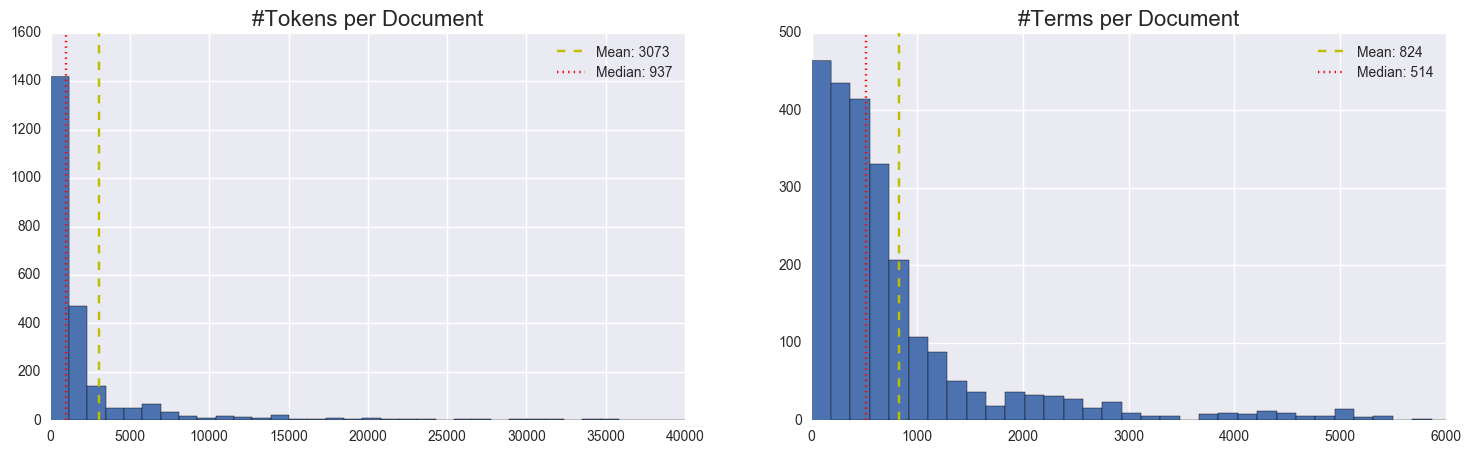

In [109]:
fig, ax = plt.subplots(1,2, figsize=(18, 5))

# Plot 1 - Terms per doc
EDA_info.doc_terms.hist(bins=100, ax=ax[0])
ax[0].set_xlim(0, 40000)

_mean = EDA_info.doc_terms.mean()
ax[0].axvline(x=_mean, linestyle='--', color='y', label='Mean: {:.0f}'.format(_mean))

_median = EDA_info.doc_terms.median()
ax[0].axvline(x=_median, linestyle=':', color='r', label='Median: {:.0f}'.format(_median))
ax[0].set_title('#Tokens per Document', fontsize=16)
ax[0].legend()

# Plot 2 - Tokens per doc
EDA_info.doc_tokens.hist(bins=50, ax=ax[1])
ax[1].set_xlim(0, 6000)

_mean = EDA_info.doc_tokens.mean()
ax[1].axvline(x=_mean, linestyle='--', color='y', label='Mean: {:.0f}'.format(_mean))

_median = EDA_info.doc_tokens.median()
ax[1].axvline(x=_median, linestyle=':', color='r', label='Median: {:.0f}'.format(_median))
ax[1].set_title('#Terms per Document', fontsize=16)
ax[1].legend()

plt.show()

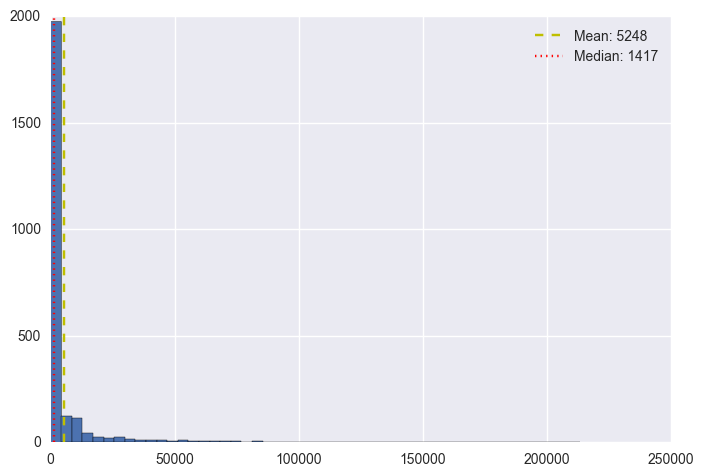

In [30]:
EDA_info.raw_num.hist(bins=50)

_mean = EDA_info.raw_num.mean()
plt.axvline(x=_mean, linestyle='--', color='y', label='Mean: {:.0f}'.format(_mean))

_median = EDA_info.raw_num.median()
plt.axvline(x=_median, linestyle=':', color='r', label='Median: {:.0f}'.format(_median))

plt.legend()
plt.show()

#### Alternative vizes

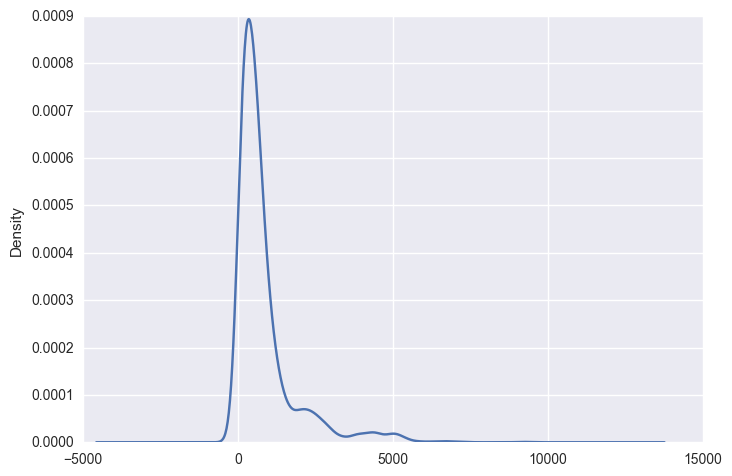

In [35]:
EDA_info.doc_tokens.plot(kind='kde')
plt.show()

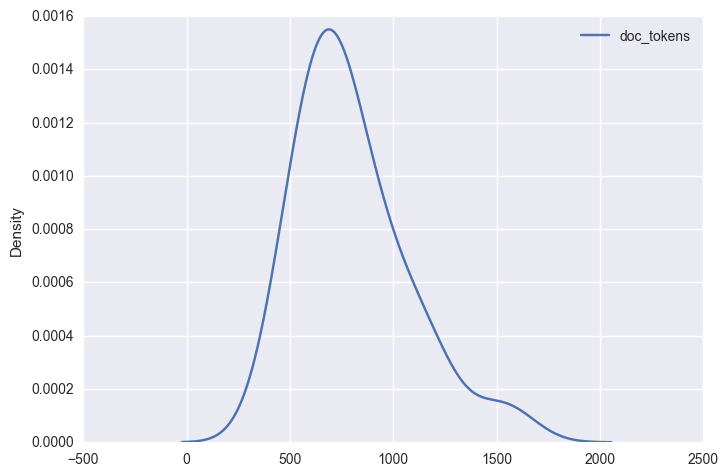

In [32]:
EDA_info[['ticker', 'doc_tokens']].groupby('ticker').mean().plot(kind='kde')

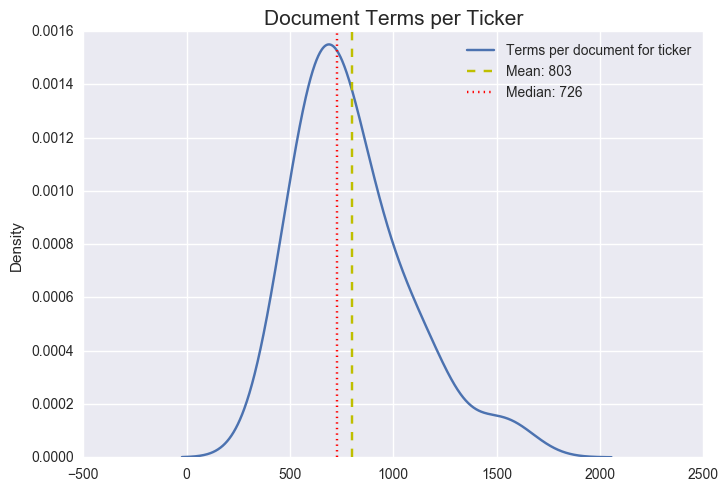

In [113]:
data = EDA_info[['ticker', 'doc_tokens']].groupby('ticker').doc_tokens.mean()
data.plot(kind='kde', label='Terms per document for ticker')

_mean = data.mean()
plt.axvline(x=_mean, linestyle='--', color='y', label='Mean: {:.0f}'.format(_mean))

_median = data.median()
plt.axvline(x=_median, linestyle=':', color='r', label='Median: {:.0f}'.format(_median))

plt.legend()

plt.title('Document Terms per Ticker', fontsize=15)
plt.show()

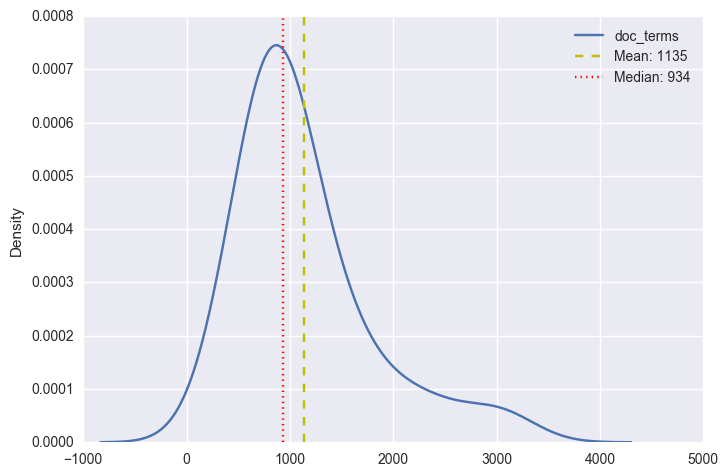

In [39]:
data = EDA_info[['ticker', 'doc_terms']].groupby('ticker').doc_terms.median()
data.plot(kind='kde')

_mean = data.mean()
plt.axvline(x=_mean, linestyle='--', color='y', label='Mean: {:.0f}'.format(_mean))

_median = data.median()
plt.axvline(x=_median, linestyle=':', color='r', label='Median: {:.0f}'.format(_median))

plt.legend()
plt.show()

## Documents per Company

In [12]:
doc_count = {}
total_docs = 0

for i, f in enumerate(DATA_FILES):
    name = f.replace('.csv', '').split('/')[-1]

    # Get doc count
    _df = pd.read_csv(f)    
    docs = _df.shape[0]
    
    # Record
    doc_count[name] = docs
    total_docs += docs
    
    if i % 100 == 0:
        print '- Done', i

- Done 0
- Done 100
- Done 200
- Done 300
- Done 400
- Done 500
- Done 600
- Done 700
- Done 800
- Done 900
- Done 1000
- Done 1100
- Done 1200
- Done 1300
- Done 1400


In [24]:
print 'Total documents: {:,}'.format(total_docs)

Total documents: 195,140


In [16]:
doc_counts = pd.DataFrame.from_dict(doc_count, orient='index')
doc_counts.columns = ['Doc_count']

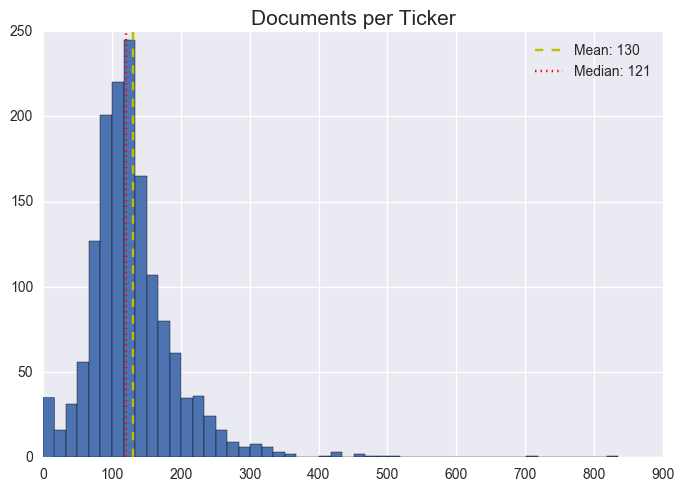

In [25]:
doc_counts.Doc_count.hist(bins=50)

_mean = doc_counts.Doc_count.mean()
plt.axvline(x=_mean, linestyle='--', color='y', label='Mean: {:.0f}'.format(_mean))

_median = doc_counts.Doc_count.median()
plt.axvline(x=_median, linestyle=':', color='r', label='Median: {:.0f}'.format(_median))

plt.title('Documents per Ticker', fontsize=15)

plt.legend()
plt.show()